# Classification Heart Disease
* In this notebook, we will do a alot of data viasualization and classification of the heart disease


# Outlines

**Comprehensive EDA Processes**
* Data Underestanding
* Data visualization
* Feature Analysis
* Correlation Matrix
* Data Preprocessing and Prepration
    1. Outlier detection
    2. Missing Values
    
**Comprehensive Building Modelas and hyperparameters Tuning**
* Building Different Models like:
    1. Logistic Regression
    2. Ridge Classifier
    3. K-Nearest Neighbors (KNN)
    4. Support Vector Machine (SVM)
    5. Bagged Decision Trees (Bagging)
    6. Random Forest
    7. Stochastic Gradient Boosting
* hyperparameters Tuning
    1. Grid Search
    2. Randomized Search

# Import the necessary libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Loading the dataset into the kernel

In [ ]:
data = pd.read_csv("../input/heart-disease-uci/heart.csv")
data.shape

# Gaining some information about the dataset


# Data Underestanding 

In [ ]:
data.head()

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [ ]:
data.info()

In [ ]:
data.columns

In [ ]:
data.describe()

In [ ]:
#knowing the data type of each column
data.dtypes

# Data Visualization

In [ ]:
#We can count the target variables with this method 
data.target.value_counts()

* Let's plot the target variables in a Bar chart to get more underestanding of it

In [ ]:
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
sns.countplot(x='target',data=data)

Great! we do not have imbalanced data in the target variables

* Now, Let's plot the sex column to see how Male and Female categories are distibuted
* Luckinly we have the amazing library Seaborn to see the relationshipp between the male and female

In [ ]:
sns.countplot(x='sex', data=data, palette="pastel")
plt.xlabel("Sex (0 = female, 1= male)") # Representing values 
plt.show()

In [ ]:
plt.figure(figsize=(8,6))
sns.set_style('dark')
sns.countplot(x='target',hue='sex',data=data,palette='RdBu_r')
plt.title("The distribution of Sex column in relation to the Target column")

In [ ]:
plt.figure(figsize=(8,6))
sns.set_style('dark')
sns.countplot(x='target',hue='thal',data=data)
plt.title("The Distribution of thal in relation to the Target column")

In [ ]:
#Bar Plot and this is providing distribution of age
sns.barplot(x=data.age.value_counts()[:10].index,y=data.age.value_counts()[:10].values)
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.title('Age Calculation')
plt.show()


In [ ]:
# Bar chart for age with sorted index
plot = data[data.target == 1].age.value_counts().sort_index().plot(kind = "bar", figsize=(15,5), fontsize = 15)
plot.set_title("Age Distribution", fontsize = 15)
plt.ioff()

In [ ]:
data['age'].plot(kind='hist',bins=30,color='red',figsize= (16,7))

In [ ]:
#We will practise how can we use 'lineplot'
data.chol.plot(kind="line",color="green",label="chol",grid=True,linestyle=":")
data.thalach.plot(kind="line",color="purple",label="thalach",grid=True)
data.age.plot(kind="line",color="pink",label="age",grid=True)
data.trestbps.plot(kind="line",color="orange",label="trestbps",grid=True)
plt.legend(loc="upper right") #legend: puts feature label into plot
plt.xlabel("indexes")
plt.ylabel("Features")
plt.title("Heart Diseases")
plt.show()

In [ ]:
#We will practise how can we use Scatter Plot
#I want to compare 'age' and 'chol'. Is there any connection with these features?
data.plot(kind="scatter", x="age", y="chol", alpha= 0.5, color="brown")
plt.xlabel("age")
plt.ylabel("chol")
plt.title("age and chol with Scatter Plot")
plt.show()

In [ ]:
#Lets find type of heart attack by all ages. (cp values)
age_list=list(data.age.unique())
#cp_list= list(data.cp.unique())
cp_zero=[]
cp_one=[]
cp_two=[]
cp_three=[]
for i in age_list:
    x= data[data['age']==i]
    cp_zero.append(sum(x.cp==0)/len(x))
    cp_one.append(sum(x.cp==1)/len(x))
    cp_two.append(sum(x.cp==2)/len(x))
    cp_three.append(sum(x.cp==3)/len(x))
#Visualization
f,ax= plt.subplots(figsize=(15,9))
sns.barplot(y=cp_zero,x=age_list,color='purple',alpha=0.5,label='Type 0')
sns.barplot(y=cp_one,x=age_list,color='green',alpha=0.7,label='Type 1')
sns.barplot(y=cp_two,x=age_list,color='yellow',alpha=0.6,label='Type 2')
sns.barplot(y=cp_three,x=age_list,color='blue',alpha=0.6,label='Type 3')

ax.legend(loc='lower right',frameon=True)
ax.set(xlabel='Ages', ylabel='Cp values', title='Type of heart attack by age')

In [ ]:
#Distribution for all numeric variables 


for i in data.columns:
    plt.hist(data[i])
    plt.title(i)
    plt.show()

# Feature Analysis

# slope & target

In [ ]:
sns.factorplot(x="slope", y ="target", data=data, kind="bar", size=3)
plt.show()

# exang & target

In [ ]:
sns.factorplot(x="exang", y ="target", data=data, kind="bar", size=3)
plt.show()

# restecg & target

In [ ]:
sns.factorplot(x="restecg", y ="target", data=data, kind="bar", size=3)
plt.show()

# Age & target

In [ ]:
g = sns.FacetGrid(data, row="target")
g.map(sns.distplot, "age", bins=25)
plt.show()

# chol & target

In [ ]:
g = sns.FacetGrid(data, row="target")
g.map(sns.distplot, "chol", bins=25)
plt.show()

Lets compare

* age
* chol (serum cholestoral in mg/dl),
* trestbps values (resting blood pressure) and find the correlation!

In [ ]:
#Sorted Chol values by age
age_list= list(data.age.unique())
chol_ratio=[]
for i in age_list:
    x=data[data['age']==i]
    chol_rate=sum(x.chol)/len(x)
    chol_ratio.append(chol_rate)
datac= pd.DataFrame({'age_list': age_list,'chol_ratio': chol_ratio})
new_index=(datac['chol_ratio'].sort_values(ascending=False)).index.values
sorted_data=datac.reindex(new_index)
sorted_data.head()

In [ ]:
#Sorted trestbps values by age
age_list= list(data.age.unique())
tbps_ratio=[]
for i in age_list:
    x=data[data['age']==i]
    tbps_rate=sum(x.trestbps)/len(x)
    tbps_ratio.append(tbps_rate)
datat= pd.DataFrame({'age_list': age_list,'tbps_ratio': tbps_ratio})
new_index=(datat['tbps_ratio'].sort_values(ascending=False)).index.values
sorted_data2=datat.reindex(new_index)
sorted_data2.head()

In [ ]:
#We have values in two different ranges so I normalized them.
sorted_data['chol_ratio']=sorted_data['chol_ratio']/max(sorted_data['chol_ratio'])
sorted_data2['tbps_ratio']=sorted_data2['tbps_ratio']/max(sorted_data2['tbps_ratio'])
data_all=pd.concat([sorted_data,sorted_data2['tbps_ratio']],axis=1)
data_all.sort_values('chol_ratio',inplace=True)
data_all.head()

In [ ]:
#Visualization with point plot
f,ax1 = plt.subplots(figsize=(12,10))
sns.pointplot(x=data_all['age_list'],y=data_all['chol_ratio'],data_all=data_all,color='lime',alpha=0.8)
sns.pointplot(x=data_all['age_list'],y=data_all['tbps_ratio'],data_all=data_all,color='purple',alpha=0.8)
plt.text(40,0.58,'chol ratio',color='lime',fontsize=18,style='normal')
plt.text(40,0.55,'trestbps ratio',color='purple',fontsize=18,style='normal')
plt.xlabel('Ages',fontsize=15,color='orange')
plt.ylabel('Values',fontsize=15,color='orange')
plt.title('Chol vs Trestbps Values',fontsize=20,color='orange')
plt.grid()

In [ ]:
#I want to learn chest pain type (cp) according in heart data.
labels= data.cp.value_counts().index
colors=["orange","pink","brown","gray"]
explode= [0,0,0,0]
sizes=data.cp.value_counts().values
#Visualization with pie plot
plt.figure(figsize=(7,7))
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%')
plt.title('Chest pain type(cp) according to Heart Dataset',color="blue",fontsize=15)

# Correlation Matrix

In [ ]:
#correlation matrix to find out the most related features to the "target" 
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, cmap="coolwarm", vmax=.8, square=True, annot=True);

In [ ]:
#it is too much features to look at, let's look at the top 10 features related to the target column
# Top 10 Heatmap
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'target')['target'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# Data Prepration

# Outlier Detection for our dataset
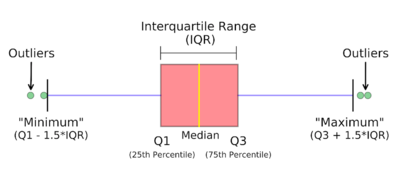

* Q1 = 1.Quartile 25%
* Q2 = 2.Quartile 50% (median)
* Q3 = 3.Quartile 75%
* IQR = Q3 - Q1
* Outlier data = (Q1 - 1.5 IQR ) U (Q3 + 1.5 IQR)

In [ ]:
def outlier_detect(feature, data):
    outlier_index = []

    for each in feature:
        Q1 = np.percentile(data[each], 25)
        Q3 = np.percentile(data[each], 75)
        IQR = Q3 - Q1
        min_quartile = Q1 - 1.5*IQR
        max_quartile = Q3 + 1.5*IQR
        outlier_list = data[(data[each] < min_quartile) | (data[each] > max_quartile)].index
        outlier_index.extend(outlier_list)
        
    outlier_index = Counter(outlier_index)
    #If there are three or more outlier data features we must delete them. (n)
    outlier_data = list(i for i, n in outlier_index.items() if n > 3)
    return outlier_data

In [ ]:
outlier_data = outlier_detect(["age","trestbps","restecg","thalach","chol","oldpeak"], data)
data.loc[outlier_data]

 Great, we do not have outlier data in our dataset

In [ ]:
data = data.drop(outlier_data, axis=0).reset_index(drop=True)

# Missing Values

In [ ]:
#missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)

* Great, we do not have missing values

# Buidling the model

## Grid Search
All you need to do in GridSearch is tell it which hyperparameters you want it to experiment with, and what values to try out, and it will evaluate all the possible combinations of hyperparameter values, using cross-validation.

## Randomized Search
the grid search approach is fine when you are exploring relatevely few combinations, but when the hyperparameter search space is large, it is often preferable to use `RandomizedSearchCV` instead. This technique evaluates a given number of random combinations by selecting a random value for each hyperparameter at every iteration. This approach has two main benefits:
- If you let the randomized search run for 1000 iterations it will explore 1000 different values for each hyperparameter.
- You have more control over the computing budget you want to allocate to hyperparameter search, simply by setting the number of iterations.

# 1. Logistic Regression

Logistic regression does not really have any critical hyperparameters to tune.

Sometimes, you can see useful differences in performance or convergence with different solvers (solver).
- **solver** in `[‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’]`

Regularization (penalty) can sometimes be helpful.
- **penalty** in `[‘none’, ‘l1’, ‘l2’, ‘elasticnet’]`

**Note:** not all solvers support all regularization terms.

- The **C** parameter controls the penality strength, which can also be effective. **C** in `[100, 10, 1.0, 0.1, 0.01]`

The example below demonstrates grid searching the key hyperparameters for LogisticRegression on a synthetic binary classification dataset.

In [ ]:
# example of grid searching key hyperparametres for logistic regression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# define dataset
X = data.drop('target', axis=1)
y = data.target

# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01, 0.001]

# define grid search
grid = dict(solver=solvers, penalty=penalty, C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, 
                           scoring='accuracy',error_score=0, iid=True)
grid_result = grid_search.fit(X, y)

# summarize results
print(f"Best: {grid_result.best_score_:.3f} using {grid_result.best_params_}")

# 2. Ridge Classifier

Ridge regression is a penalized linear regression model for predicting a numerical value.

Nevertheless, it can be very effective when applied to classification.

Perhaps the most important parameter to tune is the regularization strength (alpha). A good starting point might be values in the range `[0.1 to 1.0]`

- alpha in `[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]`

In [ ]:
from sklearn.linear_model import RidgeClassifier

# define models and parameters
model = RidgeClassifier()
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# define grid search
grid = dict(alpha=alpha)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, 
                           scoring='accuracy',error_score=0, iid=True)
grid_result = grid_search.fit(X, y)

# summarize results
print(f"Best: {grid_result.best_score_:.3f} using {grid_result.best_params_}")

# 3. K-Nearest Neighbors (KNN)

The most important hyperparameter for KNN is the number of neighbors (n_neighbors).

Test values between at least `1` and `21`, perhaps just the odd numbers.

- n_neighbors in `[1 to 21]`

It may also be interesting to test different distance metrics (metric) for choosing the composition of the neighborhood.

- metric in `[‘euclidean’, ‘manhattan’, ‘minkowski’]`

It may also be interesting to test the contribution of members of the neighborhood via different weightings (weights).

- weights in `[‘uniform’, ‘distance’]`

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# define models and parameters
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, 
                           scoring='accuracy',error_score=0, iid=True)
grid_result = grid_search.fit(X, y)

# summarize results
print(f"Best: {grid_result.best_score_:.3f} using {grid_result.best_params_}")

# 4. Support Vector Machine (SVM)

The SVM algorithm, like gradient boosting, is very popular, very effective, and provides a large number of hyperparameters to tune.

Perhaps the first important parameter is the choice of kernel that will control the manner in which the input variables will be projected. There are many to choose from, but `linear`, `polynomial`, and `RBF` are the most common, perhaps just linear and RBF in practice.

- kernels in `[‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’]`

If the polynomial kernel works out, then it is a good idea to dive into the degree hyperparameter.

Another critical parameter is the `penalty (C)` that can take on a range of values and has a dramatic effect on the shape of the resulting regions for each class. A log scale might be a good starting point.

- C in `[100, 10, 1.0, 0.1, 0.001]`

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

x_sc = StandardScaler()
X_std = x_sc.fit_transform(X)

# define model and parameters
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = [0.001, 0.01, 0.1, 1, 10]

# define grid search
grid = dict(kernel=kernel, C=C, gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, 
                           scoring='accuracy',error_score=0, iid=True)
grid_result = grid_search.fit(X_std, y)

# summarize results
print(f"Best: {grid_result.best_score_:.3f} using {grid_result.best_params_}")

# 5. Bagged Decision Trees (Bagging)

The most important parameter for bagged decision trees is the number of trees (n_estimators).

Ideally, this should be increased until no further improvement is seen in the model.

Good values might be a log scale from 10 to 1,000.

- n_estimators in `[10, 100, 1000]`

In [ ]:
from sklearn.ensemble import BaggingClassifier

# define models and parameters
model = BaggingClassifier()
n_estimators = [10, 100, 1000, 1500]

# define grid search
grid = dict(n_estimators=n_estimators)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, 
                           scoring='accuracy',error_score=0, iid=True)
grid_result = grid_search.fit(X, y)

# summarize results
print(f"Best: {grid_result.best_score_:.3f} using {grid_result.best_params_}")

# 6. Random Forest

The most important parameter is the number of random features to sample at each split point (max_features).

You could try a range of integer values, such as 1 to 20, or 1 to half the number of input features.

- max_features `[1 to 20]`

Alternately, you could try a suite of different default value calculators.

- max_features in `[‘sqrt’, ‘log2’]`

Another important parameter for random forest is the number of trees (n_estimators).

Ideally, this should be increased until no further improvement is seen in the model.

Good values might be a log scale from 10 to 1,000.

- n_estimators in `[10, 100, 1000]`

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# define models and parameters
model = RandomForestClassifier()
n_estimators = [10, 100, 1000, 1500]
max_features = ['sqrt', 'log2']

# define grid search
grid = dict(n_estimators=n_estimators, max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, 
                           scoring='accuracy',error_score=0, iid=True)
grid_result = grid_search.fit(X, y)

# summarize results
print(f"Best: {grid_result.best_score_:.3f} using {grid_result.best_params_}")

# 7. Stochastic Gradient Boosting

Also called Gradient Boosting Machine (GBM) or named for the specific implementation, such as XGBoost.

The gradient boosting algorithm has many parameters to tune.

There are some parameter pairings that are important to consider. The first is the learning rate, also called shrinkage or eta (`learning_rate`) and the number of trees in the model (`n_estimators`). Both could be considered on a log scale, although in different directions.

- learning_rate in `[0.001, 0.01, 0.1]`
- n_estimators `[10, 100, 1000]`

Another pairing is the number of rows or subset of the data to consider for each tree (`subsample`) and the depth of each tree (`max_depth`). These could be grid searched at a 0.1 and 1 interval respectively, although common values can be tested directly.

- subsample in `[0.5, 0.7, 1.0]`
- max_depth in `[3, 7, 9]`

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# define models and parameters
model = GradientBoostingClassifier()
n_estimators = [10, 100, 1000]
learning_rate = [0.001, 0.01, 0.1]
subsample = [0.5, 0.7, 1.0]
max_depth = [3, 7, 9]

# define grid search
grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, 
            max_depth=max_depth)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, 
                           scoring='accuracy',error_score=0, iid=True)
grid_result = grid_search.fit(X, y)

# summarize results
print(f"Best: {grid_result.best_score_:.3f} using {grid_result.best_params_}")

# Summary
* in this notebook we have learnded very interesting topics such as:

**Comprehensive EDA Processes**
* Data Underestanding
* Data visualization
* Feature Analysis
* Correlation Matrix
* Data Preprocessing and Prepration
    1. Outlier detection
    2. Missing Values
    
**Comprehensive Building Modelas and hyperparameters Tuning**
* Building Different Model like:
    1. Logistic Regression
    2. Ridge Classifier
    3. K-Nearest Neighbors (KNN)
    4. Support Vector Machine (SVM)
    5. Bagged Decision Trees (Bagging)
    6. Random Forest
    7. Stochastic Gradient Boosting
* hyperparameters Tuning
    1. Grid Search
    2. Randomized Search

# Hope, you enjoy reading my notebook
# I would appreciate any comments and supports for improving 